In [1]:
# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 10 submission</b></u>
### Roster Name: Edmond Lin
### Preferred Name (if different): Chosen Name
### Student ID: 012290668
### Email address: edmond.lin@sjsu.edu
##  <u>Solution</u>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend

In [20]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [21]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

In [22]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [23]:
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [24]:
## input layer
input_layer = Input(shape=(784,))   # 28*28

## encoding architecture
encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)
encode_layer3 = Dense(32, activation='relu')(encode_layer2)


## decoding architecture
decode_layer1 = Dense(64, activation='relu')(encode_layer3)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(784, activation='sigmoid')(decode_layer2)

## output layer
model = Model(input_layer, decode_layer3)

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 784)               1011

In [29]:
model.compile(optimizer='adam', loss='mse')
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import keras

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = "/tmp/autoencoder",
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

model.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation),
                callbacks = [tboard_callback])

Epoch 1/30
24/24 [==============================] - 2s 74ms/step - loss: 0.1483 - val_loss: 0.0867
Epoch 2/30
24/24 [==============================] - 1s 52ms/step - loss: 0.0774 - val_loss: 0.0578
Epoch 3/30
24/24 [==============================] - 1s 54ms/step - loss: 0.0534 - val_loss: 0.0441
Epoch 4/30
24/24 [==============================] - 2s 74ms/step - loss: 0.0422 - val_loss: 0.0366
Epoch 5/30
24/24 [==============================] - 1s 52ms/step - loss: 0.0352 - val_loss: 0.0326
Epoch 6/30
24/24 [==============================] - 1s 52ms/step - loss: 0.0313 - val_loss: 0.0289
Epoch 7/30
24/24 [==============================] - 2s 100ms/step - loss: 0.0280 - val_loss: 0.0265
Epoch 8/30
24/24 [==============================] - 2s 64ms/step - loss: 0.0261 - val_loss: 0.0258
Epoch 9/30
24/24 [==============================] - 1s 52ms/step - loss: 0.0251 - val_loss: 0.0248
Epoch 10/30
24/24 [==============================] - 1s 49ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 11

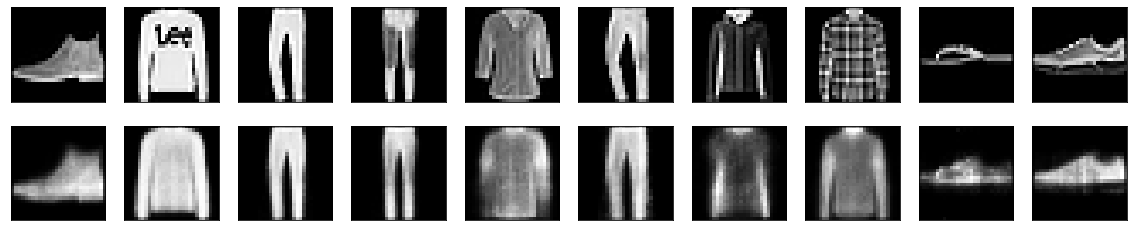

In [30]:
predictions = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=True)]

In [32]:
%load_ext tensorboard
%tensorboard --logdir=/tmp/autoencoder
# %reload_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 46233), started 0:02:15 ago. (Use '!kill 46233' to kill it.)

In [33]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [34]:
input_layer = Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation))

Epoch 1/30
24/24 [==============================] - 49s 2s/step - loss: 0.6818 - val_loss: 0.6185
Epoch 2/30
24/24 [==============================] - 52s 2s/step - loss: 0.5830 - val_loss: 0.4664
Epoch 3/30
24/24 [==============================] - 48s 2s/step - loss: 0.4280 - val_loss: 0.3685
Epoch 4/30
24/24 [==============================] - 37s 2s/step - loss: 0.3643 - val_loss: 0.3511
Epoch 5/30
24/24 [==============================] - 34s 1s/step - loss: 0.3492 - val_loss: 0.3425
Epoch 6/30
24/24 [==============================] - 39s 2s/step - loss: 0.3418 - val_loss: 0.3366
Epoch 7/30
24/24 [==============================] - 40s 2s/step - loss: 0.3355 - val_loss: 0.3325
Epoch 8/30
24/24 [==============================] - 45s 2s/step - loss: 0.3325 - val_loss: 0.3298
Epoch 9/30
24/24 [==============================] - 68s 3s/step - loss: 0.3294 - val_loss: 0.3276
Epoch 10/30
24/24 [==============================] - 36s 1s/step - loss: 0.3274 - val_loss: 0.3257
Epoch 11/30
24/24 [

In [36]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

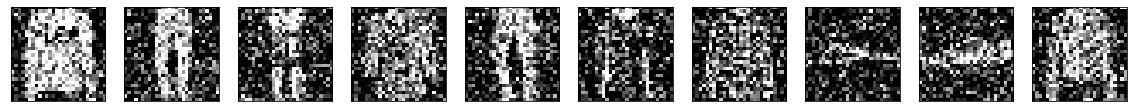

In [37]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [38]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0  

In [39]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 151s 6s/step - loss: 0.6231 - val_loss: 0.3900
Epoch 2/30
24/24 [==============================] - 85s 4s/step - loss: 0.3740 - val_loss: 0.3402
Epoch 3/30
24/24 [==============================] - 116s 5s/step - loss: 0.3351 - val_loss: 0.3270
Epoch 4/30
24/24 [==============================] - 133s 6s/step - loss: 0.3246 - val_loss: 0.3189
Epoch 5/30
24/24 [==============================] - 85s 4s/step - loss: 0.3179 - val_loss: 0.3147
Epoch 6/30
24/24 [==============================] - 81s 3s/step - loss: 0.3148 - val_loss: 0.3122
Epoch 7/30
24/24 [==============================] - 75s 3s/step - loss: 0.3118 - val_loss: 0.3106
Epoch 8/30
24/24 [==============================] - 65s 3s/step - loss: 0.3101 - val_loss: 0.3082
Epoch 9/30
24/24 [==============================] - 90s 4s/step - loss: 0.3082 - val_loss: 0.3080
Epoch 10/30
24/24 [==============================] - 75s 3s/step - loss: 0.3065 - val_loss: 0.3052
Epoch 11/30
24/2

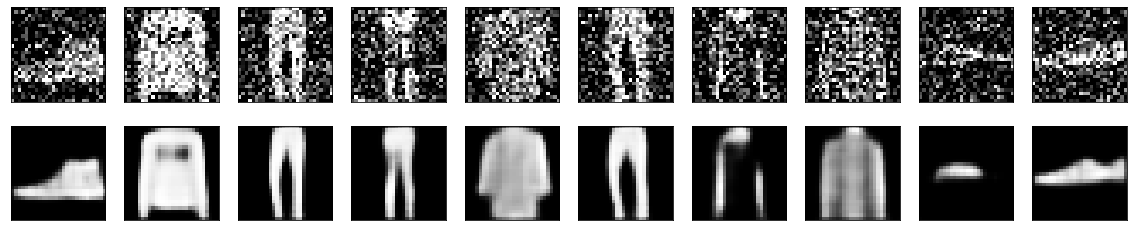

In [40]:
 predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()